In [1]:
import os
import pandas as pd
archive_path = "./archive/Real estate.csv"
dataset = pd.read_csv(archive_path)
dataset = dataset.drop(dataset.columns[0], axis=1)
print(dataset.head(10))

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   
5             2012.667           7.1                              2175.03000   
6             2012.667          34.5                               623.47310   
7             2013.417          20.3                               287.60250   
8             2013.500          31.7                              5512.03800   
9             2013.417          17.9                              1783.18000   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     12

In [2]:
print(dataset.shape)

(414, 7)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# Создаем модель линейной регрессии
model = LinearRegression()
# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)
# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)
# Вычисляем метрики качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Выводим результаты
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")
# Выводим полученные коэффициенты модели
print(f"Коэффициенты модели: {model.coef_}")
print(f"Свободный член: {model.intercept_}")

Среднеквадратичная ошибка (MSE): 45.01
Коэффициент детерминации (R^2): 0.70
Коэффициенты модели: [ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]
Свободный член: -12796.117684899287


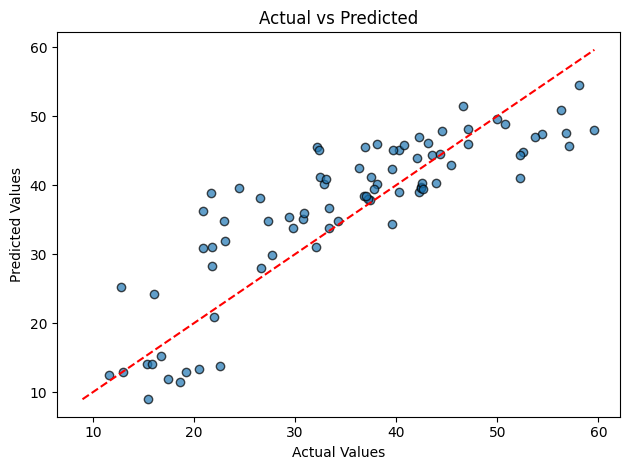

In [4]:
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')  
    
min_val = min(y_test.min(), y_pred.min())  
max_val = max(y_test.max(), y_pred.max()) 
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  
plt.title('Actual vs Predicted') 
plt.xlabel('Actual Values')        
plt.ylabel('Predicted Values')    

plt.tight_layout()
plt.show()

In [5]:
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))
#сначала предсказанное значение, потом истинное значение

[[35. 27.]
 [47. 54.]
 [21. 22.]
 [12. 12.]
 [43. 45.]
 [35. 23.]
 [31. 22.]
 [46. 32.]
 [38. 37.]
 [14. 23.]
 [12. 17.]
 [38. 37.]
 [32. 23.]
 [45. 37.]
 [51. 56.]
 [36. 21.]
 [44. 44.]
 [45. 40.]
 [30. 28.]
 [44. 42.]
 [52. 47.]
 [28. 22.]
 [40. 38.]
 [47. 54.]
 [46. 57.]
 [28. 27.]
 [31. 32.]
 [48. 57.]
 [46. 43.]
 [15. 17.]
 [34. 33.]
 [35. 34.]
 [42. 40.]
 [45. 52.]
 [48. 47.]
 [13. 13.]
 [41. 38.]
 [41. 32.]
 [39. 42.]
 [13. 20.]
 [39. 40.]
 [24. 16.]
 [55. 58.]
 [37. 33.]
 [35. 31.]
 [39. 22.]
 [31. 21.]
 [40. 42.]
 [46. 38.]
 [34. 40.]
 [11. 19.]
 [44. 44.]
 [45. 40.]
 [14. 15.]
 [49. 51.]
 [42. 36.]
 [44. 52.]
 [39. 38.]
 [38. 26.]
 [40. 42.]
 [25. 13.]
 [40. 33.]
 [35. 29.]
 [13. 19.]
 [40. 43.]
 [45. 32.]
 [39. 43.]
 [47. 42.]
 [14. 16.]
 [40. 44.]
 [48. 44.]
 [ 9. 16.]
 [34. 30.]
 [40. 24.]
 [50. 50.]
 [38. 37.]
 [36. 31.]
 [38. 37.]
 [41. 33.]
 [48. 60.]
 [46. 41.]
 [41. 52.]
 [46. 47.]]


## Difference in Fits


In [9]:
# Метод Difference in Fits
import math
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
n=X_train.shape[0]
k=6
value=2*math.sqrt((k+2)/(n-k-2))
influential_indexes=[]
def hii(X_j,X_train):
    X_train_values = X_train.values
    X_i = X_j.values.flatten()
    hi=np.dot(X_i,np.linalg.inv(X_train_values.T.dot(X_train_values)))
    hii=np.dot(hi,X_i)
    return hii
def difference_in_fits(y_train, y_test, X_train, X_test):
    for j in range(0, n):
        # Обучаем модель на тренировочных данных
        # Сохраняем i-ю строку для последующего предсказания
        X_j = X_train.iloc[[j]]
        
        hi = hii(X_j, X_train)
        y_j = y_train.iloc[[j]]        
        # Делаем предсказания на тестовых данных
        y_with_j = model.predict(X_j)        
        # Удаляем j-ю строку из данных
        X_train_with_drop = X_train.drop(X_train.index[j])
        y_train_with_drop = y_train.drop(y_train.index[j])
        
        # Обучаем модель заново без i-й точки
        model.fit(X_train_with_drop, y_train_with_drop)
        
        # Делаем предсказания на тестовых данных без учета i-й точки
        y_without_j = model.predict(X_j) 
        # Вычисляем разницу между предсказанными значениями
        diff = y_with_j - y_without_j
        model.fit(X_train_with_drop, y_train_with_drop)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        DFFITS=diff/(math.sqrt(mse * hi))
        if abs(DFFITS)>value:
            influential_indexes.append(j)
    return influential_indexes

anomaly_indices = difference_in_fits(y_train, y_test, X_train, X_test)
print("индексы аномальных данных ", anomaly_indices)
# Удалим аномалии из y_test и X_test
y_train_filtered = y_train.drop(y_train.index[anomaly_indices])
X_train_filtered = X_train.drop(X_train.index[anomaly_indices])
# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train_filtered, y_train_filtered)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Вычисляем метрики качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Выводим результаты
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")
# Выводим полученные коэффициенты модели
print(f"Коэффициенты модели: {model.coef_}")
print(f"Свободный член: {model.intercept_}")



индексы аномальных данных  [8, 9, 16, 17, 27, 30, 31, 40, 59, 60, 67, 76, 79, 89, 97, 104, 126, 131, 134, 138, 140, 145, 151, 155, 156, 161, 162, 170, 171, 181, 183, 191, 209, 210, 216, 260, 265, 268, 276, 288, 292]
Среднеквадратичная ошибка (MSE): 41.91
Коэффициент детерминации (R^2): 0.72
Коэффициенты модели: [ 4.e+00 -3.e-01 -5.e-03  1.e+00  2.e+02 -5.e+01]
Свободный член: -6822.11929874137
